### 1.Lets read Data & perform basic analysis!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r'C:\Users\chandu.v01\Downloads\Python DataSceince\Bitcoin Analysis/bitcoin_price_Training - Training.csv')

In [14]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,17-Feb-20,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,18-Feb-20,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,19-Feb-20,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,20-Feb-20,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,21-Feb-20,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [15]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [16]:
df.shape

(1556, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


### 2.Doing data pre-processing!
    Check whether data-types are correct or not 
    check whether Data have missing value or not 
    check whether data have duplicate entries or not !

In [19]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [ ]:
'''
pandas Data Type for Time-Series : 
    a ) datetime64[ns]
    datetime64[ns] is a 64 bit number ie it uses/occupies 64 bits or 8-Bytes in computer memory to store datetime value ..

    b ) datetime64[ns, tz]

    c ) datetime64[ns, UTC]
    
    d ) dtype('<M8[ns]') or dtype('>M8[ns]')
    
 M is a type character code for Datetime
 8 represents element byte length, data size ie 8-byte or 64 bit 
    where UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone
'''

In [20]:
### convert feature into date-time
## pd.to_datetime()
df['Date'] = df['Date'].astype('datetime64[ns]')

In [21]:
df['Date'].min()

Timestamp('2020-02-17 00:00:00')

In [22]:
df['Date'].max()

Timestamp('2024-05-21 00:00:00')

In [ ]:
'''

i.e, data is collected from "17th Febreury 2020" to "21st May 2024"

'''

In [23]:
df['Date']

0      2020-02-17
1      2020-02-18
2      2020-02-19
3      2020-02-20
4      2020-02-21
          ...    
1551   2024-05-17
1552   2024-05-18
1553   2024-05-19
1554   2024-05-20
1555   2024-05-21
Name: Date, Length: 1556, dtype: datetime64[ns]

In [24]:
type(df['Date'][0])

### i.e, Timestamp is a Scaler Class ..

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
df.isnull().sum() 
## check whether we have missing value or not !

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [26]:
df.duplicated().sum()  
## No duplicated value ..

np.int64(0)

#### Now sorting the data from oldest to recent

In [27]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-02-17,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2020-02-18,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2020-02-19,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [28]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2024-05-19,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2024-05-20,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2024-05-21,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [30]:
df.sort_index(ascending=False).reset_index()

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2024-05-21,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2024-05-20,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2024-05-19,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2024-05-18,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2024-05-17,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2020-02-21,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2020-02-20,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2020-02-19,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2020-02-18,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [31]:
data = df.sort_index(ascending=False).reset_index()

### 3.Analysing change in price of the stock overtime!

In [32]:
data.drop('index' , axis=1 , inplace=True)

In [33]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-05-21,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2024-05-20,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2024-05-19,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2024-05-18,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2024-05-17,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2020-02-21,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2020-02-20,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2020-02-19,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2020-02-18,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [34]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

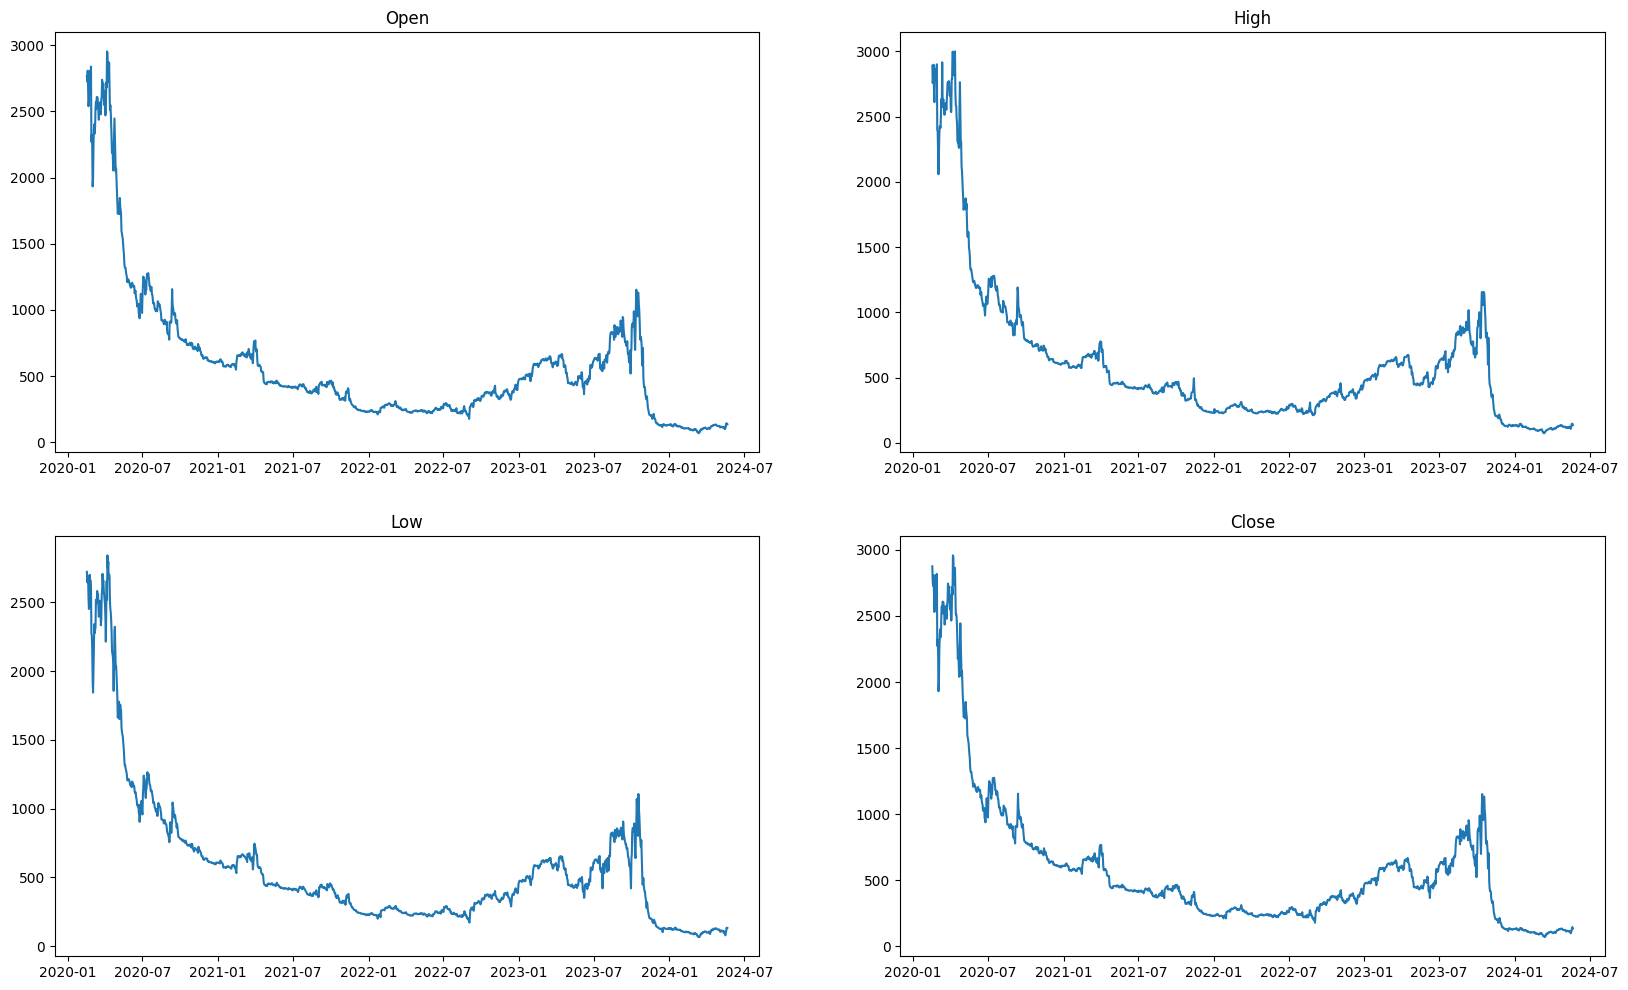

In [35]:
plt.figure(figsize=(20,12))

for index , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

### 4.Analysing open, high, low and close value of Bitcoin!

In [36]:
data.shape

(1556, 7)

In [37]:
bitcoin_sample = data[0:50]

In [38]:
### Lets do proper setup of Plotly so that we can leverage power of Plotly & Cufflinks ..

In [39]:
!pip install chart-studio
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ------ --------------------------------- 2.4/14.8 MB 13.5 MB/s eta 0:00:01
   -------------- ------------------------- 5.5/14.8 MB 15.7 MB/s eta 0:00:01
   ---------------- ----------------------- 6.3/14.8 MB 14.7 MB/s eta 0:00:01
   ----------------- ---------------------- 6.6/14.8 MB 7.9 MB/s eta 0:00:02
   ------------------ --------------------- 6.8/14.8 MB 6.6 MB/s eta 0:00:02
   ------------------- -------------------- 7.1/14.8 MB 6.0 MB/s eta 0:00:02
   -------------------- ------------------- 7.6/14.8 MB 5.5 MB/s eta 0:00:02
   ---------------------- ----------------- 8.4/14.8 MB 5.0 MB/s eta 0:00:02
   ------------------------ --------------- 9.2/14.8 MB 4.9 MB/s eta 0:00:02
   --------------------------- ------------ 10.2/14.8 MB 4.9 MB/s eta 0:00:01
   ------------------------------ --------- 11.3/14.8 MB 4.9 MB/s eta 0:00:01


In [40]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [41]:
init_notebook_mode(connected=True)

In [42]:
trace = go.Candlestick(x=bitcoin_sample['Date'] , 
              high =bitcoin_sample['High'] , 
              open = bitcoin_sample['Open'] , 
              close = bitcoin_sample['Close'] , 
              low = bitcoin_sample['Low'])

In [43]:
candle_data = [trace]
layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

In [46]:
fig = go.Figure(data = candle_data , layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

### 5.Analysing Closing price (on normal scale & log-scale)!

In [47]:
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

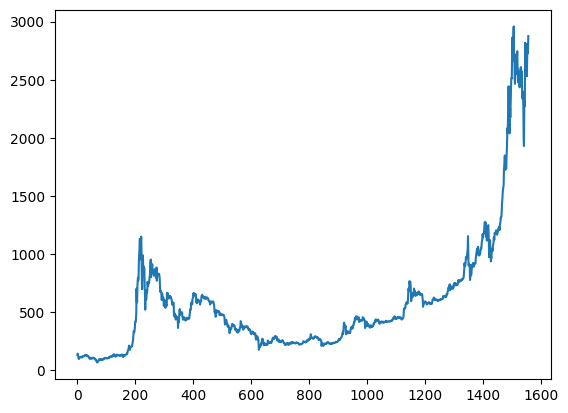

In [48]:
data['Close'].plot()

In [ ]:
## On above plot , x-indices are number , lets first set "date" as per index so that u will get date on "x-indexes"
## using pandas plot "data['Close'].plot()" , so for pandas plot our row indexes must be date ..

In [49]:
data.set_index('Date' , inplace=True)

In [50]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2024-05-21,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2024-05-20,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2024-05-19,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2024-05-18,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2024-05-17,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2020-02-21,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2020-02-20,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2020-02-19,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

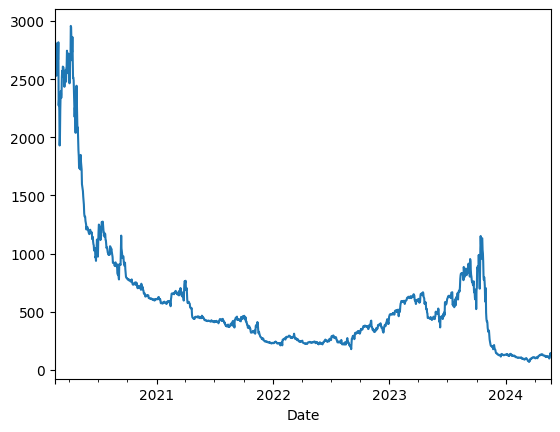

In [51]:
data['Close'].plot()

<Axes: xlabel='Date'>

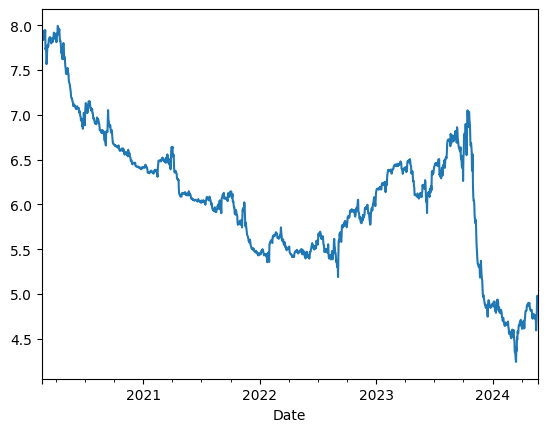

In [52]:
np.log1p(data['Close']).plot()

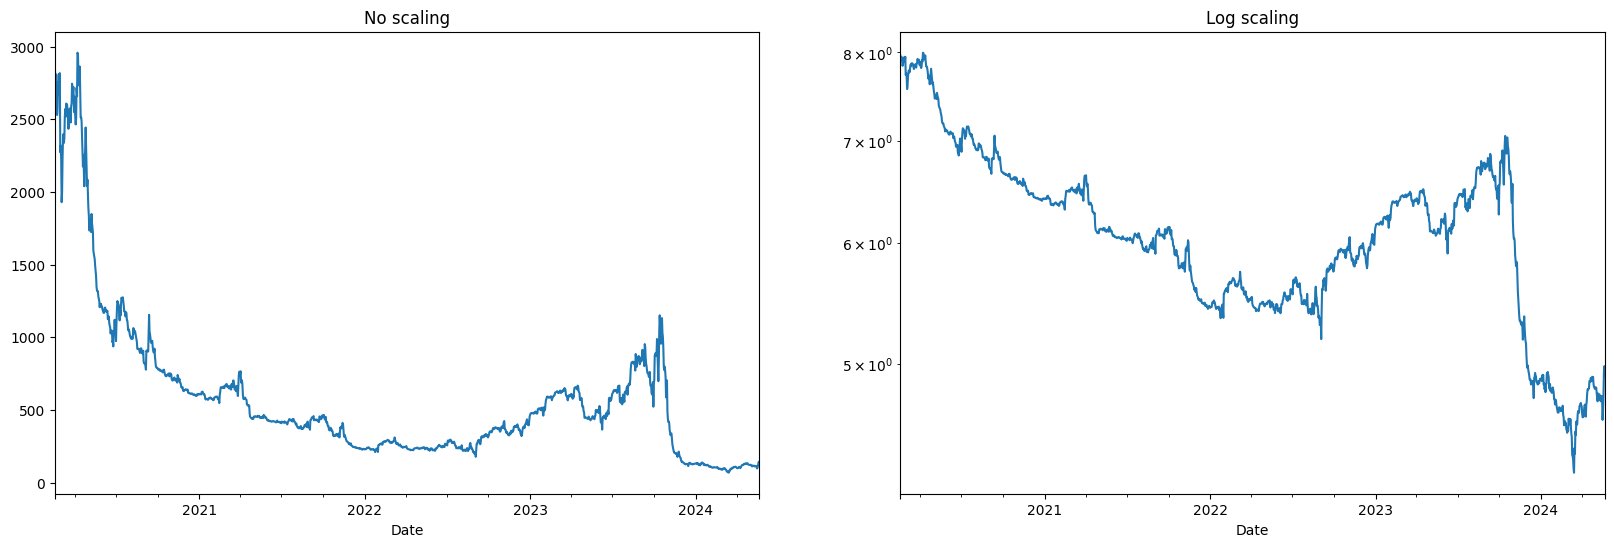

In [53]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

In [ ]:
### Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases..

### log scale is always better if u have outliers or some high values in data

### 6.Analyse closing price on Yaerly, Quarterly and Monthly basis!

In [ ]:
'''
    Before doing resampling , first we have to make your date feature 'row-index' so that we can resample it in a 
    a..yearly('YE')  , 
    b..quarterly('QE')   ,
    c..monthly('ME') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')
    
'''

In [54]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2024-05-21,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2024-05-20,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2024-05-19,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2024-05-18,139.00,139.89,107.72,116.99,-,"1,542,820,000"


In [56]:
## finding avg price of bitcoin on yearly basis ..
data['Close'].resample('YE').mean()

Date
2020-12-31    1322.108903
2021-12-31     456.659753
2022-12-31     281.916192
2023-12-31     553.313534
2024-12-31     111.155634
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

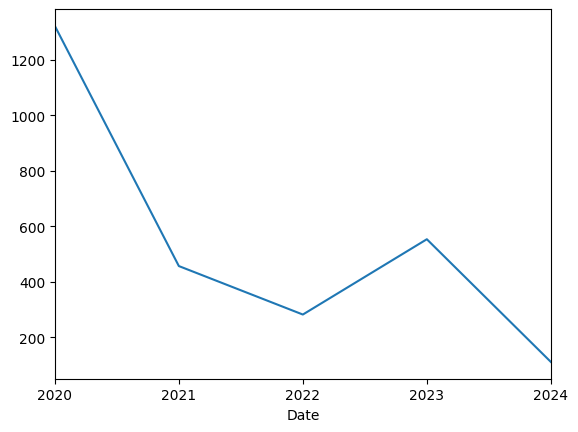

In [57]:
data['Close'].resample('YE').mean().plot()

In [61]:
## finding avg price of bitcoin on quarterly basis ..
data['Close'].resample('QE').mean()

Date
2020-03-31    2543.751136
2020-06-30    1688.203846
2020-09-30    1011.111413
2020-12-31     686.727065
2021-03-31     625.437889
2021-06-30     476.283077
2021-09-30     414.146957
2021-12-31     314.653478
2022-03-31     257.300667
2022-06-30     237.506374
2022-09-30     261.635000
2022-12-31     370.204891
2023-03-31     562.024333
2023-06-30     512.802418
2023-09-30     719.638587
2023-12-31     418.537826
2024-03-31     107.289011
2024-06-30     118.054902
Freq: QE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

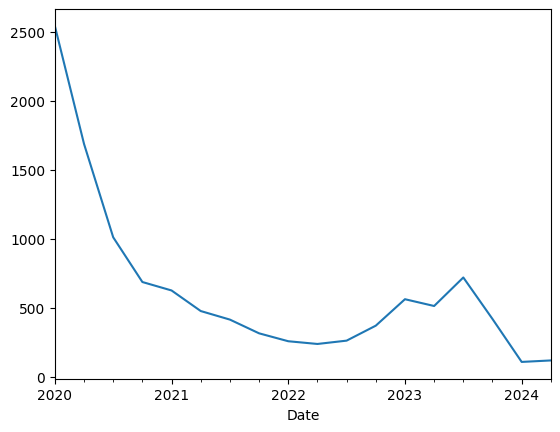

In [60]:
data['Close'].resample('QE').mean().plot()

In [63]:
## finding avg price of bitcoin on monthly basis ..
data['Close'].resample('ME').mean()

Date
2020-02-29    2692.296923
2020-03-31    2481.457742
2020-04-30    2457.790333
2020-05-31    1506.414516
2020-06-30    1106.466333
2020-07-31    1164.548065
2020-08-31     961.419032
2020-09-30     903.909000
2020-10-31     757.579032
2020-11-30     688.001667
2020-12-31     614.641613
2021-01-31     591.718710
2021-02-28     615.993571
2021-03-31     667.687419
2021-04-30     557.293333
2021-05-31     451.700645
2021-06-30     420.674667
2021-07-31     421.528065
2021-08-31     386.685161
2021-09-30     434.897000
2021-10-31     379.558710
2021-11-30     324.185667
2021-12-31     240.523548
2022-01-31     231.311613
2022-02-28     277.700000
2022-03-31     264.864516
2022-04-30     233.647667
2022-05-31     234.037097
2022-06-30     244.950000
2022-07-31     264.946129
2022-08-31     230.030968
2022-09-30     290.871000
2022-10-31     363.848065
2022-11-30     362.414000
2022-12-31     384.101290
2023-01-31     489.249677
2023-02-28     582.518929
2023-03-31     616.287742
2023-04

<Axes: xlabel='Date'>

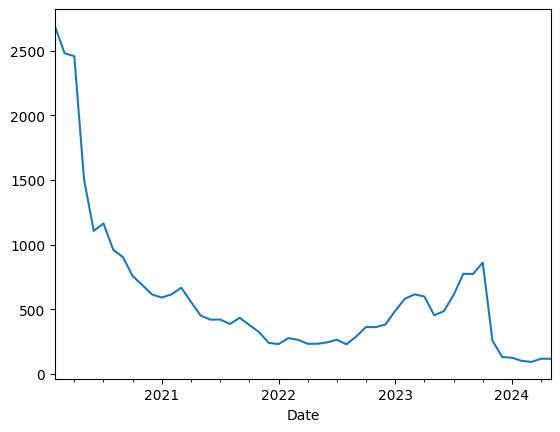

In [64]:
data['Close'].resample('ME').mean().plot()

In [66]:
## finding avg price of bitcoin on weekely basis ..
data['Close'].resample('W').mean()

Date
2020-02-23    2706.527143
2020-03-01    2624.721429
2020-03-08    2212.137143
2020-03-15    2541.884286
2020-03-22    2521.782857
                 ...     
2024-04-28     128.840000
2024-05-05     119.284286
2024-05-12     114.737143
2024-05-19     114.237143
2024-05-26     139.375000
Freq: W-SUN, Name: Close, Length: 223, dtype: float64

<Axes: xlabel='Date'>

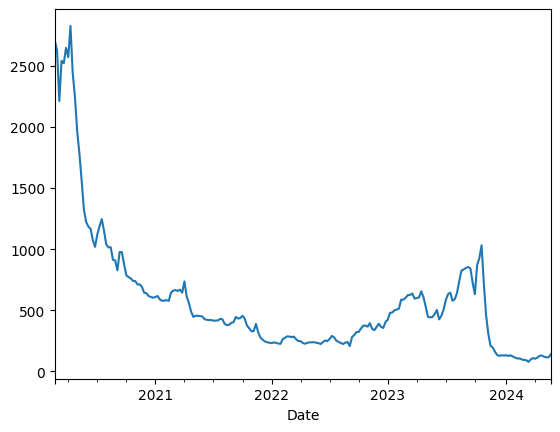

In [67]:
data['Close'].resample('W').mean().plot()

In [68]:
## finding avg price of bitcoin on daily basis ..
data['Close'].resample('D').mean()

Date
2020-02-17    2875.34
2020-02-18    2757.18
2020-02-19    2726.45
2020-02-20    2809.01
2020-02-21    2671.78
               ...   
2024-05-17     105.21
2024-05-18     116.99
2024-05-19     139.00
2024-05-20     144.54
2024-05-21     134.21
Freq: D, Name: Close, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

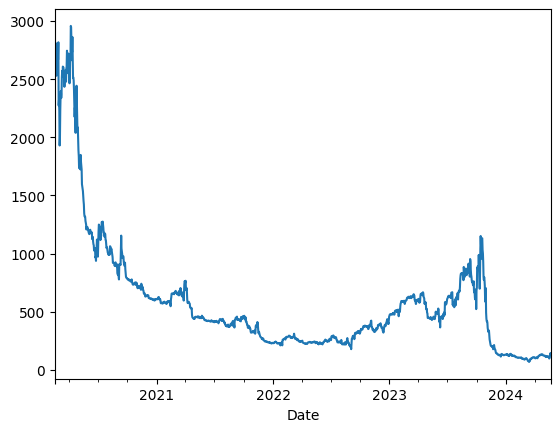

In [69]:
data['Close'].resample('D').mean().plot()

In [74]:
## finding avg price of bitcoin on minutes basis ..
data['Close'].resample('5min').mean()

Date
2020-02-17 00:00:00    2875.34
2020-02-17 00:05:00        NaN
2020-02-17 00:10:00        NaN
2020-02-17 00:15:00        NaN
2020-02-17 00:20:00        NaN
                        ...   
2024-05-20 23:40:00        NaN
2024-05-20 23:45:00        NaN
2024-05-20 23:50:00        NaN
2024-05-20 23:55:00        NaN
2024-05-21 00:00:00     134.21
Freq: 5min, Name: Close, Length: 447841, dtype: float64

<Axes: xlabel='Date'>

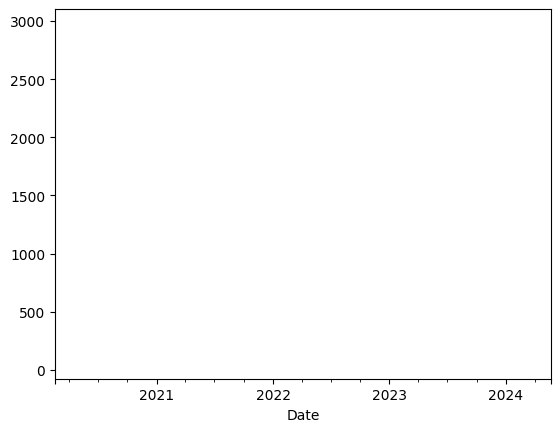

In [75]:
data['Close'].resample('5min').mean().plot()

### 7.Analysing daily change in Closing price of stocks!

In [ ]:
'''
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price.
    Then, multiply the result by the number of shares you own in the company.
'''

In [76]:
data['Close']

Date
2024-05-21     134.21
2024-05-20     144.54
2024-05-19     139.00
2024-05-18     116.99
2024-05-17     105.21
               ...   
2020-02-21    2671.78
2020-02-20    2809.01
2020-02-19    2726.45
2020-02-18    2757.18
2020-02-17    2875.34
Name: Close, Length: 1556, dtype: float64

In [77]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

In [78]:
data['Close_price_pct_change']

Date
2024-05-21          NaN
2024-05-20     7.696893
2024-05-19    -3.832849
2024-05-18   -15.834532
2024-05-17   -10.069237
                ...    
2020-02-21     5.626915
2020-02-20     5.136276
2020-02-19    -2.939114
2020-02-18     1.127107
2020-02-17     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

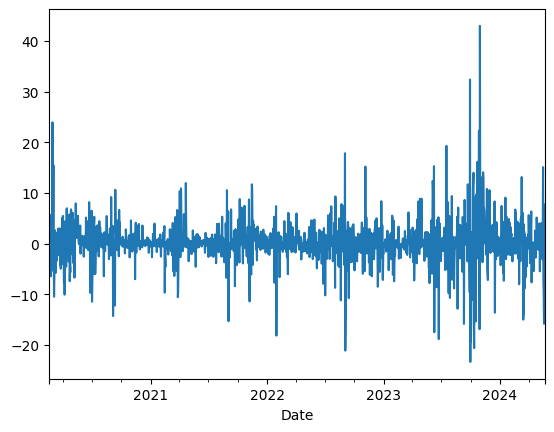

In [79]:
data['Close_price_pct_change'].plot()

In [ ]:
'''
If we want to make this Pandas plot interactive , u can think of using cufflinks & Plotly
'''

In [80]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

In [ ]:
## chart_studio provides a web-service for hosting graphs!
## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot() when working in a Jupyter Notebook to display the plot in the notebook.
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.

In [82]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68765 sha256=3b0d7ead1aed289a6ac77c4934544d2748982397446a10052e6f0d6ed5bd7f54
  Stored in directory: c:\users\chandu.v01\appdata\local\pip\cache\wheels\13\bc\65\1ac45445dba1052b5e837dc49f5282c8cb2f934ae9e6f62f0e
Successfully built cufflinks


In [83]:
import cufflinks as cf

In [84]:
cf.go_offline()

In [85]:
data['Close_price_pct_change']

Date
2024-05-21          NaN
2024-05-20     7.696893
2024-05-19    -3.832849
2024-05-18   -15.834532
2024-05-17   -10.069237
                ...    
2020-02-21     5.626915
2020-02-20     5.136276
2020-02-19    -2.939114
2020-02-18     1.127107
2020-02-17     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

In [86]:
type(data['Close_price_pct_change'])

pandas.core.series.Series

In [ ]:
data['Close_price_pct_change'].iplot()

In [90]:
import numpy as np
alpha = float(np.float64(1.0))  # Convert to native Python float
color = f'rgba(255, 153, 51, {alpha})'